# Task 1

**Problem:** select 3 models to predict NBA player salary
1. linear regression model
2. KNN regression model
3. Random forest / Support vector machine

**Data:** NBA_Train.csv, NBA_Test.csv

**Metadata:** https://stats.nba.com/help/glossary/

**Resonse variable:** Salary

**Performance metric:** Root mean squared error (RMSE) < 4.1 ($Millions) --  at least 2/3 models have to achieve this goal




# Data processing and EDA

In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline
sns.set_style("darkgrid")

In [5]:
NBA_train = pd.read_csv('NBA_Train.csv')
NBA_test = pd.read_csv('NBA_Test.csv')

In [6]:
# NBA_train.info()
NBA_train.describe().round(4)

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000,126.0000
mean,63.5000,6.7842,26.6825,69.4603,1809.0159,14.9643,0.5425,5.1548,15.1167,10.1365,14.4571,1.5873,1.5222,13.4865,19.9897,107.1825,106.8651,2.3373,1.8397,4.1825
std,36.5171,5.6479,4.0805,11.4330,703.5615,4.3063,0.0457,3.8254,6.0185,4.6266,9.8211,0.6176,1.3595,4.1566,4.9621,7.5899,3.6799,2.6395,1.1787,3.4027
min,1.0000,0.1114,19.0000,40.0000,393.0000,6.3000,0.4460,1.0000,6.2000,4.1000,2.1000,0.2000,0.0000,7.2000,9.3000,88.0000,97.0000,-0.9000,0.0000,-0.1000
25%,32.2500,2.3852,23.0000,62.0000,1290.2500,12.4250,0.5100,2.1250,10.1250,6.0250,7.0250,1.1250,0.6000,10.4000,16.4250,102.0000,104.0000,0.6000,0.9000,1.7250
50%,63.5000,4.5000,26.0000,72.5000,1859.0000,14.0000,0.5400,3.7000,13.8000,9.2000,11.2500,1.5000,1.1000,12.5000,19.1000,107.0000,107.0000,1.6500,1.6000,3.1500
75%,94.7500,9.5914,29.0000,79.0000,2405.0000,16.7500,0.5678,7.3000,19.2000,13.9000,19.9750,2.0000,1.8750,15.5000,23.2750,112.0000,110.0000,3.3000,2.4750,5.5750
max,126.0000,22.9705,37.0000,82.0000,3122.0000,29.8000,0.7300,17.5000,32.1000,22.3000,44.3000,3.8000,7.4000,28.8000,33.0000,130.0000,115.0000,14.8000,6.4000,19.2000


In [7]:
NBA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Train_ID  126 non-null    int64  
 1   SALARY    126 non-null    float64
 2   POSITION  126 non-null    object 
 3   TEAM      126 non-null    object 
 4   Age       126 non-null    int64  
 5   Games     126 non-null    int64  
 6   Minutes   126 non-null    int64  
 7   PER       126 non-null    float64
 8   TS        126 non-null    float64
 9   ORB       126 non-null    float64
 10  DRB       126 non-null    float64
 11  TRB       126 non-null    float64
 12  AST       126 non-null    float64
 13  STL       126 non-null    float64
 14  BLK       126 non-null    float64
 15  TOV       126 non-null    float64
 16  USG       126 non-null    float64
 17  ORtg      126 non-null    int64  
 18  DRtg      126 non-null    int64  
 19  OWS       126 non-null    float64
 20  DWS       126 non-null    float6

In [8]:
# checking missing values
NBA_train.isnull().sum()

Train_ID    0
SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

In [9]:
NBA_train.corr().round(3).sort_values('SALARY')

,Train_ID,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
DRtg,-0.096,-0.266,-0.117,-0.109,-0.022,-0.301,-0.099,-0.482,-0.572,-0.583,0.144,-0.077,-0.491,-0.115,-0.069,-0.058,1.000,-0.101,-0.717,-0.326
TOV,-0.062,-0.126,0.069,-0.171,-0.220,-0.200,-0.034,0.118,-0.034,0.029,0.350,0.249,0.117,1.000,-0.318,-0.222,-0.115,-0.212,-0.065,-0.188
Train_ID,1.000,-0.077,0.035,0.103,0.029,0.010,0.084,0.014,0.034,0.023,-0.078,0.121,0.091,-0.062,-0.067,0.095,-0.096,-0.038,0.051,-0.009
ORB,0.014,-0.045,-0.079,-0.038,-0.283,0.120,0.046,1.000,0.752,0.902,-0.500,-0.346,0.638,0.118,-0.171,0.088,-0.482,-0.086,0.115,-0.028
BLK,0.091,-0.040,-0.035,-0.097,-0.235,0.098,0.138,0.638,0.601,0.655,-0.447,-0.297,1.000,0.117,-0.187,0.031,-0.491,-0.118,0.146,-0.043
Age,0.035,0.054,1.000,-0.131,-0.011,0.103,0.230,-0.079,0.052,0.005,0.085,-0.007,-0.035,0.069,0.032,0.168,-0.117,0.045,0.077,0.061
TRB,0.023,0.097,0.005,-0.061,-0.204,0.270,0.026,0.902,0.962,1.000,-0.456,-0.359,0.655,0.029,0.007,0.036,-0.583,0.006,0.249,0.088
STL,0.121,0.172,-0.007,-0.011,0.195,0.148,0.038,-0.346,-0.328,-0.359,0.452,1.000,-0.297,0.249,0.037,0.062,-0.077,0.121,0.211,0.168
DRB,0.034,0.173,0.052,-0.069,-0.132,0.334,0.002,0.752,1.000,0.962,-0.384,-0.328,0.601,-0.034,0.113,-0.005,-0.572,0.056,0.298,0.144
Games,0.103,0.205,-0.131,1.000,0.699,0.219,0.222,-0.038,-0.069,-0.061,0.054,-0.011,-0.097,-0.171,0.138,0.283,-0.109,0.388,0.489,0.470


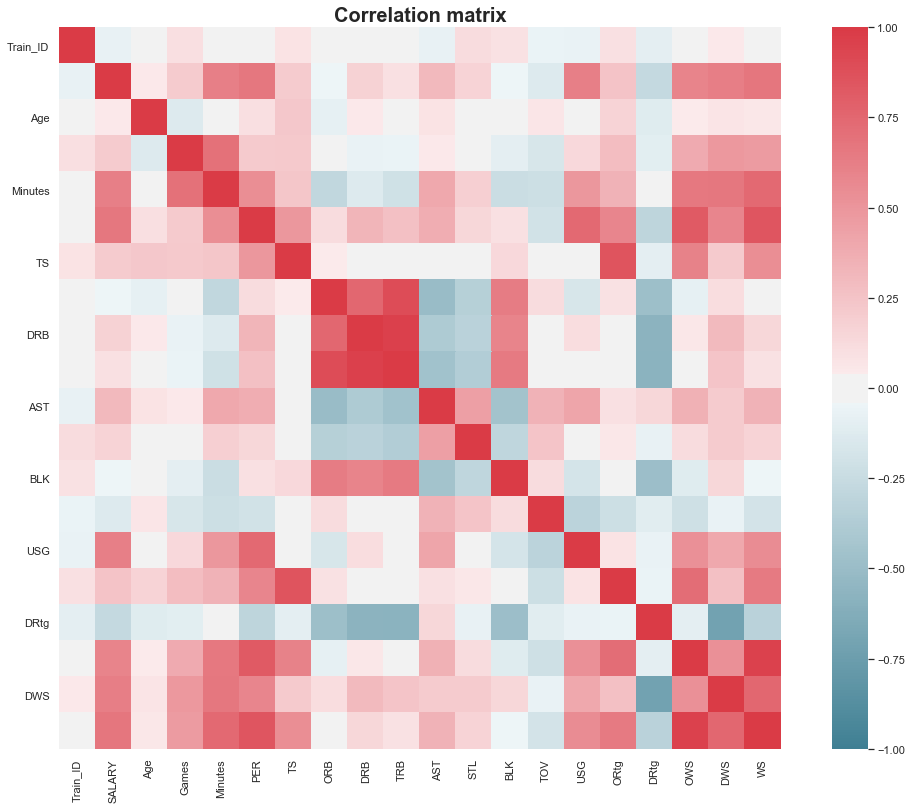

In [10]:
fig, ax = plt.subplots()

cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(NBA_train.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
fig.set_size_inches(15,15)
# plt.xticks(np.arange(0.5,len(space),1),space,fontsize=20)
# plt.yticks(np.arange(0.5,len(space),1),space,fontsize=20)

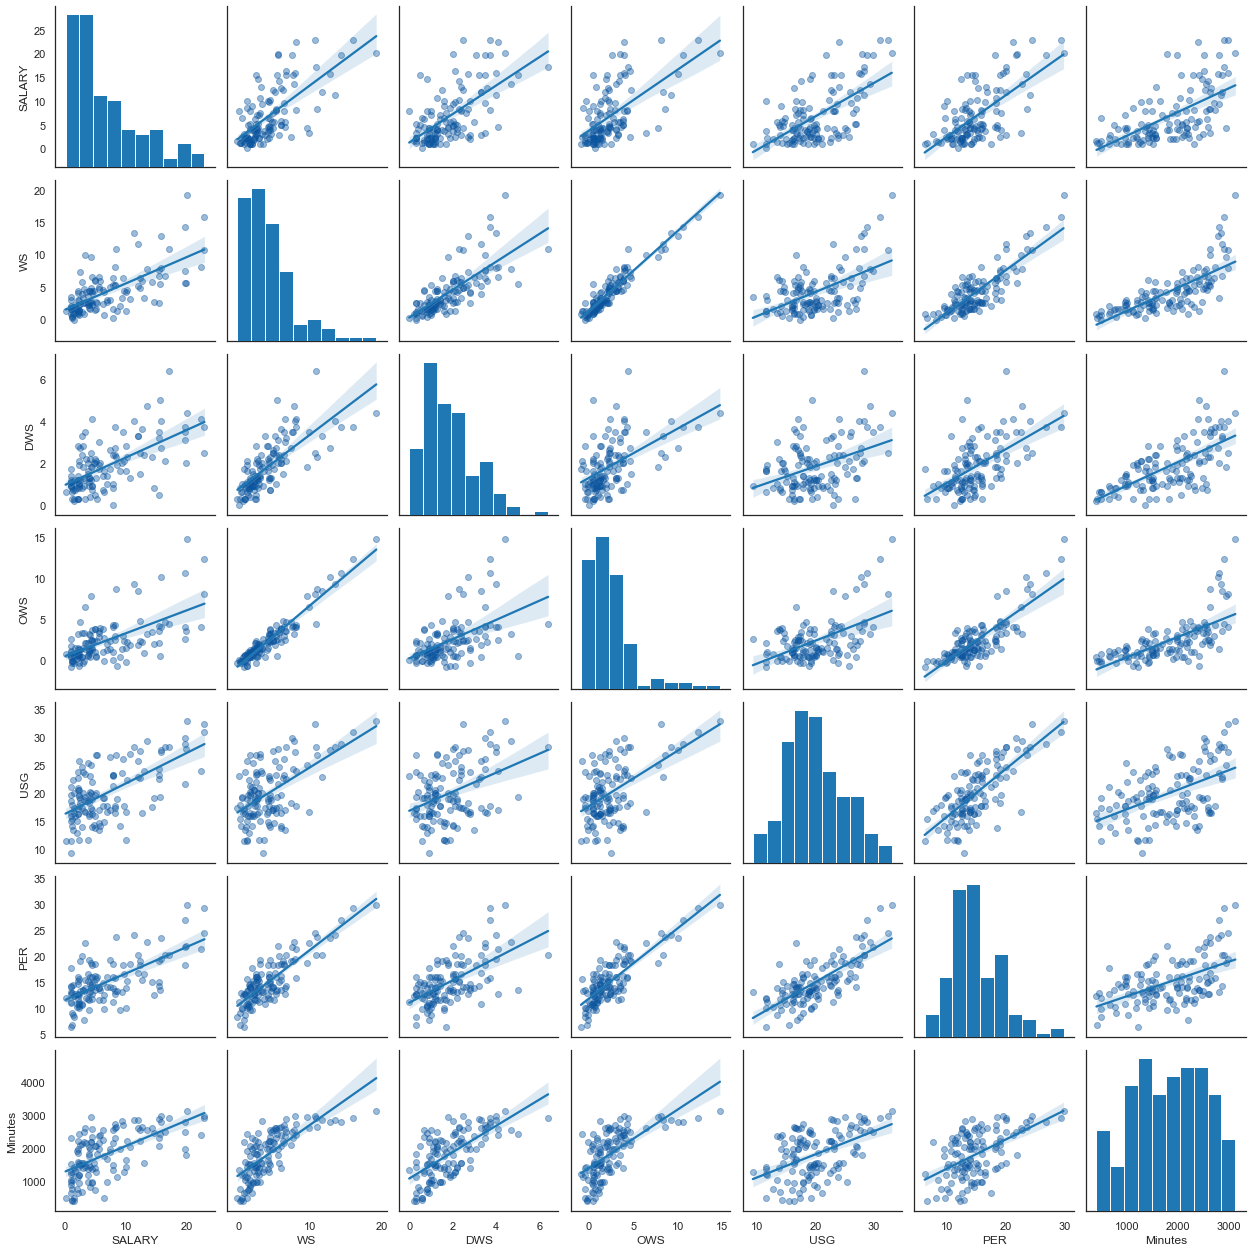

In [8]:
with sns.axes_style('white'):
    g=sns.pairplot(NBA_train[['SALARY','WS','DWS','OWS','USG','PER','Minutes']], kind='reg',
    plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha':
    0.4}})
plt.tight_layout()

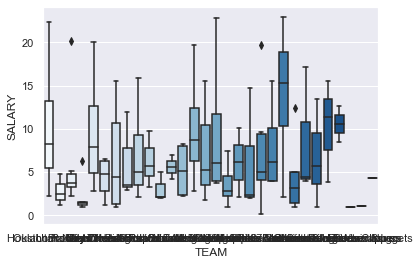

In [11]:
sns.boxplot(x=NBA_train['TEAM'], y=NBA_train['SALARY'], palette='Blues')
ax.set_xlabel('Team')
ax.set_ylabel('Salary')
plt.show()

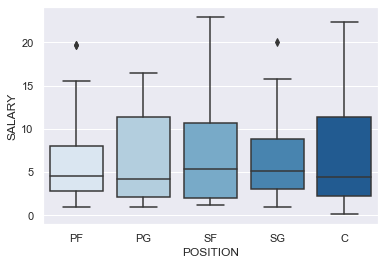

In [12]:
sns.boxplot(x=NBA_train['POSITION'], y=NBA_train['SALARY'], palette='Blues')
ax.set_xlabel('Position')
ax.set_ylabel('Salary')
plt.show()

# KNN

**Partial model**

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

NBA_train=NBA_train.drop(['TEAM','POSITION','Train_ID'],1)
NBA_test=NBA_test.drop(['TEAM','POSITION','Test_ID'],1)

In [14]:
Y_full = NBA_train['SALARY']
X_full = NBA_train.drop('SALARY',1)
X_trainF, X_valF, Y_trainF, Y_valF = train_test_split(X_full, Y_full, test_size=0.2, random_state=1)
Y_testF = NBA_test['SALARY']
X_testF = NBA_test.drop('SALARY',1)

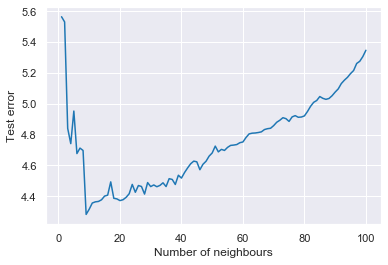

In [15]:
values = np.arange(1, 101)
knnF_valerrors = []
for k in values:

    knn = KNeighborsRegressor(n_neighbors= k) 
    knn.fit(X_trainF, Y_trainF)

    knnF_pred = knn.predict(X_valF)

    val_error = np.sqrt(mean_squared_error(Y_valF, knnF_pred))

    knnF_valerrors.append(val_error)
    
fig, ax= plt.subplots()
ax.plot(values, knnF_valerrors)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.show()

In [16]:
# 𝑘  with lowest validation error
k = 1 + np.argmin(knnF_valerrors)
knn9F = KNeighborsRegressor(n_neighbors= k) 
knn9F.fit(X_trainF, Y_trainF)
pred_knn9F = knn9F.predict(X_testF)
test_errorF = np.sqrt(mean_squared_error(Y_testF, pred_knn9F))
test_errorF

4.604189647435712

**WS vs SALARY**

In [17]:
def knn_Val(var):
    Y1 = NBA_train['SALARY']
    X1 = NBA_train.drop('SALARY',1)[var]
    X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1, Y1, test_size=0.2, random_state=1)
    Y_test1 = NBA_test['SALARY']
    X_test1 = NBA_test.drop('SALARY',1)[var]
    knn1_valerrors = []
    best_model = {}
    for k in values:

        knn = KNeighborsRegressor(n_neighbors= k) 
        knn.fit(X_train1, Y_train1)

        knn1_pred = knn.predict(X_val1)

        val_error = np.sqrt(mean_squared_error(Y_val1, knn1_pred))

        knn1_valerrors.append(val_error)

    k1 = 1 + np.argmin(knn1_valerrors)
    
    knn = KNeighborsRegressor(n_neighbors= k1) 
    knn.fit(X_train1, Y_train1)

    knn1_pred = knn.predict(X_test1)

    test_error = np.sqrt(mean_squared_error(Y_test1, knn1_pred))
    return([var,k1,min(knn1_valerrors).round(4),test_error.round(4)])


In [18]:
best_models = []
test_errors = {}
for i in NBA_train.drop('SALARY',1):
    var,k,val_rmse,test_error = knn_Val([i])
    best_models.append([i,k,val_rmse])
    test_errors[i]= test_error


In [19]:
pd.DataFrame(best_models,columns=['Variable','Number of neignbours','Validation error']).sort_values(by=['Validation error'])

,Variable,Number of neignbours,Validation error
16,DWS,20,4.1311
17,WS,8,4.1856
2,Minutes,9,4.2967
15,OWS,27,4.5046
3,PER,18,4.7217
7,TRB,5,4.7670
11,TOV,8,4.8393
12,USG,2,4.9401
6,DRB,12,4.9470
13,ORtg,12,4.9931


In [20]:
knn_Val(['USG', 'OWS', 'WS'])

[['USG', 'OWS', 'WS'], 25, 4.6802, 4.5059]

In [21]:
test_errors['WS']

4.365

# Linear regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import statsmodels.formula.api as smf

In [23]:
Y = NBA_train['SALARY']
X = NBA_train.drop(['SALARY','DWS'],1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
Y_test = NBA_test['SALARY']
X_test = NBA_test.drop(['SALARY','DWS'],1)
full_model = list(NBA_train.drop('SALARY',1).columns)

models = []
min_mse = np.inf

min_mse = np.inf
for i in range(1,11): # number of degree
    poly_transformer = PolynomialFeatures(i) 
    poly_x_train = poly_transformer.fit_transform(X_train[['WS']])
    lin_reg = LinearRegression()

    selector = RFE(lin_reg, n_features_to_select=i, step=1)
    selector = selector.fit(poly_x_train,Y_train)
        
    poly_x_val = poly_transformer.fit_transform(X_val[['WS']])
    Y_predVal = selector.predict(poly_x_val)
    mse_val = np.sqrt(mean_squared_error(Y_val, Y_predVal))
        
    poly_x_test = poly_transformer.fit_transform(X_test[['WS']])
    Y_predTest = selector.predict(poly_x_test)
    mse_test = np.sqrt(mean_squared_error(Y_test, Y_predTest))
    
    
    degrees = []
    degree = np.where(selector.support_==True)[0]
    for j in range(len(degree)):
        degrees.append(degree[j]+1)
    
    models.append([degrees,mse_val,mse_test])

poly_models = pd.DataFrame(models,columns=['Polynomial degree','Validation error','Test error']).sort_values('Validation error')

# test_errors
poly_models

,Polynomial degree,Validation error,Test error
1,"[2, 3]",4.340583,4.096469
2,"[2, 3, 4]",4.350843,4.095763
0,[2],4.361685,4.098677
3,"[2, 3, 4, 5]",8.342030,4.144374
4,"[2, 3, 4, 5, 6]",8.407928,4.144421
5,"[2, 3, 4, 5, 6, 7]",15.761628,4.179083
6,"[2, 3, 4, 5, 6, 7, 8]",47.568969,4.185573
8,"[2, 3, 4, 5, 6, 7, 8, 9, 10]",161.302845,4.498411
7,"[2, 3, 4, 5, 6, 7, 8, 9]",169.341067,4.485640
9,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",2402.254195,5.161624


In [24]:
# X1 = X_train['WS']
WS3 = X_train.WS**3
WS2 = X_train.WS**2

# WS3
data = pd.DataFrame({'WS':X_train['WS'],'WS2':WS2,'WS3':WS3,'Salary':Y_train},columns=['WS','WS2','WS3','Salary'])


formula = "Salary ~ WS2+WS3"

model_poly= smf.ols(formula = formula, data = data).fit()

model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     43.17
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.89e-14
Time:                        15:15:54   Log-Likelihood:                -284.09
No. Observations:                 100   AIC:                             574.2
Df Residuals:                      97   BIC:                             582.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1544      0.622      5.072      0.000       1.920       4.389
WS2            0.2036      0.042      4.894      0.000       0.121       0.286
WS3           -0.0088      0.003     -2.901      0.005      -0.015      -0.003
==============================================================================
Omnibus:                        8.880   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.002
Skew:                           0.585   Prob(JB):                       0.0111
Kurtosis:                       3.890   Cond. No.                         945.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best polynomial model: $f(x)=3.1544+0.2036x^2-0.0088x^3$ where $X$ is the number of WS.

In [25]:
# mlr with Recursive Feature Elimination

models = []
var_count = len(list(X_train.columns))+1
for i in range(1,var_count):

    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train,Y_train)
    Y_predVal = selector.predict(X_val)
    
    Y_predTest = selector.predict(X_test)

    mse_val = np.sqrt(mean_squared_error(Y_val, Y_predVal))
    mse_test = np.sqrt(mean_squared_error(Y_test, Y_predTest))
    
    var_index = np.where(selector.support_==True)[0]

    var = []
    for index in var_index:
        var.append(list(X_train.columns)[index])


    models.append([var, mse_val, mse_test])
    
mlr_models = pd.DataFrame(models, columns=['Variables','Validation error','Test error']).sort_values('Validation error')

In [26]:
mlr_models

,Variables,Validation error,Test error
2,"[USG, OWS, WS]",4.396360,4.146043
1,"[OWS, WS]",4.425996,4.224815
5,"[PER, TRB, STL, USG, OWS, WS]",4.440595,4.217338
3,"[STL, USG, OWS, WS]",4.461002,4.114193
4,"[TRB, STL, USG, OWS, WS]",4.469970,4.225187
0,[WS],4.550332,4.261567
6,"[PER, TRB, STL, USG, ORtg, OWS, WS]",4.671148,4.143612
16,"[Age, Games, Minutes, PER, TS, ORB, DRB, TRB, ...",4.691561,4.357228
7,"[PER, ORB, TRB, STL, USG, ORtg, OWS, WS]",4.754096,4.179210
8,"[PER, ORB, TRB, STL, TOV, USG, ORtg, OWS, WS]",4.941497,4.278604


In [27]:
formula = "Salary ~ USG+OWS+WS"
mrl_data = pd.DataFrame({'Salary':Y_train,'USG':X_train['USG'],'OWS':X_train['OWS'],'WS':X_train['WS']},columns=['Salary','USG','OWS','WS'])

model_poly= smf.ols(formula = formula, data = mrl_data).fit()

model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     54.35
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.27e-20
Time:                        15:17:57   Log-Likelihood:                -266.29
No. Observations:                 100   AIC:                             540.6
Df Residuals:                      96   BIC:                             551.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0458      1.528     -4.612      0.000     -10.078      -4.013
USG            0.4761      0.084      5.655      0.000       0.309       0.643
OWS           -1.0725      0.437     -2.452      0.016      -1.941      -0.204
WS             1.6164      0.344      4.704      0.000       0.934       2.299
==============================================================================
Omnibus:                        5.582   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.930
Skew:                           0.496   Prob(JB):                       0.0850
Kurtosis:                       3.448   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best MLR model: $f(x)=-7.0458+0.4761~USG -1.0725~OWS+1.6164~WS$

# Lasso regression

In [38]:
from sklearn.linear_model import Lasso
var_count = len(list(X_train.columns))+1
alphas = [.0001,.001, 0.01,0.1, 0.5, 5, 10]

min_val_lasso = np.inf
for alpha in alphas:    
    for i in range(1,var_count):

        model_lasso = Lasso(alpha=alpha)
        selector = RFE(model_lasso, n_features_to_select=i, step=1)
        selector = selector.fit(X_train,Y_train)
        Y_predVal = selector.predict(X_val)

        Y_predTest = selector.predict(X_test)

        mse_val = np.sqrt(mean_squared_error(Y_val, Y_predVal))
        mse_test = np.sqrt(mean_squared_error(Y_test, Y_predTest))
        
        if mse_val < min_val_lasso:
            best_alpha = alpha
            min_val_lasso = mse_val
            
            var_index = np.where(selector.support_==True)[0]

            var = []
            for index in var_index:
                var.append(list(X_train.columns)[index])
            min_test_lasso = mse_test

print("Variables selected:",var)
print("Value of alpha for lasso:",best_alpha)
print("Validation error:",min_val_lasso.round(4))
print("Test error:",min_test_lasso.round(4))
            
#         var_index = np.where(selector.support_==True)[0]

#         var = []
#         for index in var_index:
#             var.append(list(X_train.columns)[index])


#         models.append([var, mse_val, mse_test])

Variables selected: ['Games', 'Minutes', 'PER', 'DRB', 'USG']
Value of alpha for lasso: 5
Validation error: 3.9916
Test error: 4.0805
